<a href="https://colab.research.google.com/github/britssc/ecuadorian_fake_news_detection/blob/main/models_testing/FakesNewsDetectionTraditionalModels%2BRoBERTabased_finetunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection: Traditional ML models + RoBERTa finetuning

Ecuador's 2025 Election Dataset (623 News)

In [8]:
!pip install SciencePlots
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-white')
import numpy as np
import os

## DataSet Analysis

## 1. Reading the data set

In [10]:
import pandas as pd
import scienceplots
plt.style.use(['science', 'notebook', 'no-latex'])

data = pd.read_excel('Datos.xlsx')

## 2. Visualization of the data set

In [11]:
# Tweets of each type found in the training dataset.
data['real'].value_counts()

,count
real,
1,323
0,299


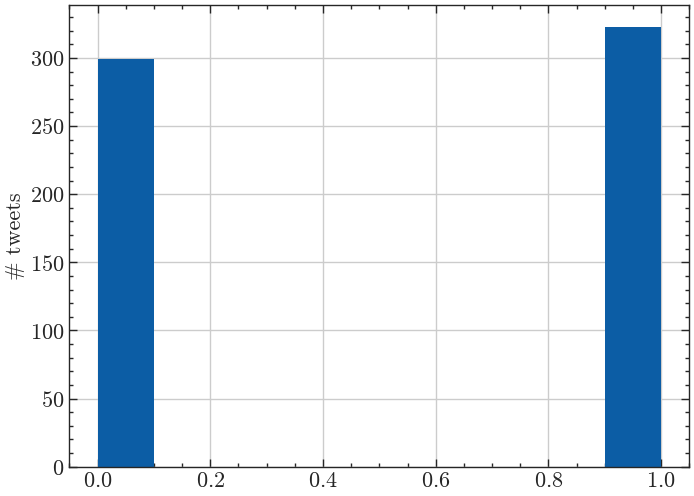

In [12]:

data['real'].hist()
plt.ylabel("# tweets")
plt.show()

Always perform an exploratory analysis of the data distribution to determine the best way to solve the problem.

### Number of words per Tweet

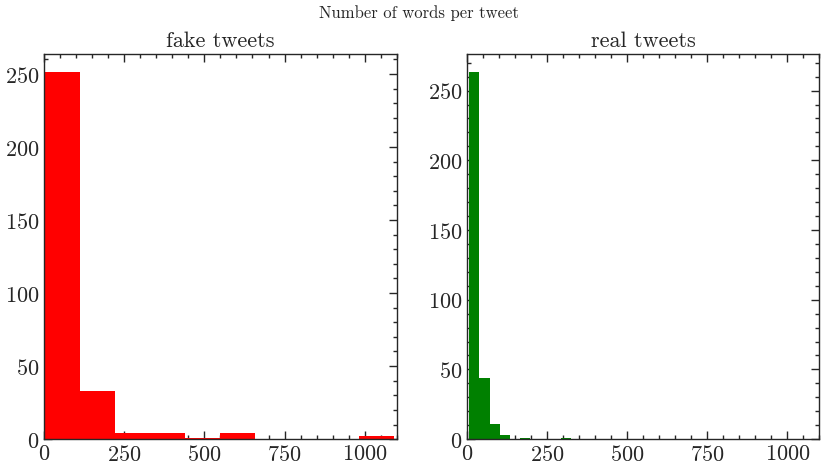

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# We calculate the number of words
tweet_len_0 = data[data['real'] == 0]['text'].str.split().map(lambda x: len(x))
tweet_len_1 = data[data['real'] == 1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake tweets')
ax1.set_xlim([0,1100])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real tweets')
ax2.set_xlim([0,1100])

fig.suptitle('Number of words per tweet')

plt.show()

### Number of unique words per Tweet

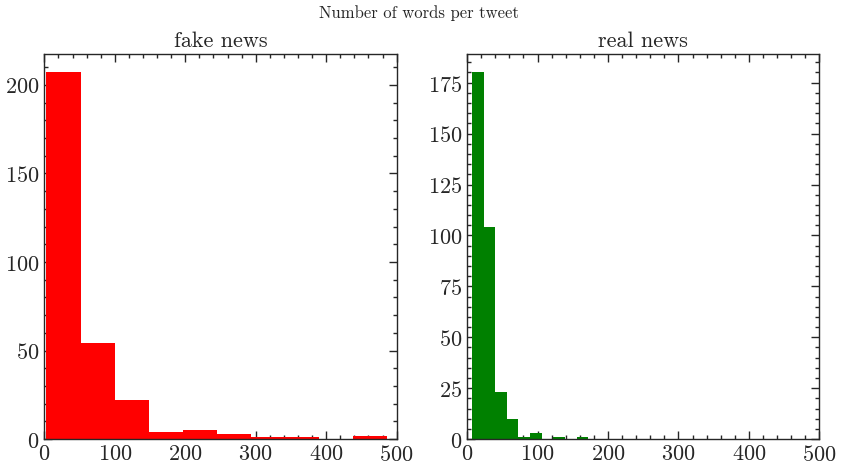

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# We calculate the number of words
tweet_len_0 = data[data['real'] == 0]['text'].str.split().map(lambda x: len(set(x)))
tweet_len_1 = data[data['real'] == 1]['text'].str.split().map(lambda x: len(set(x)))

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake news')
ax1.set_xlim([0,500])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real news')
ax2.set_xlim([0,500])

fig.suptitle('Number of words per tweet')

plt.show()

### Average word length per Tweet

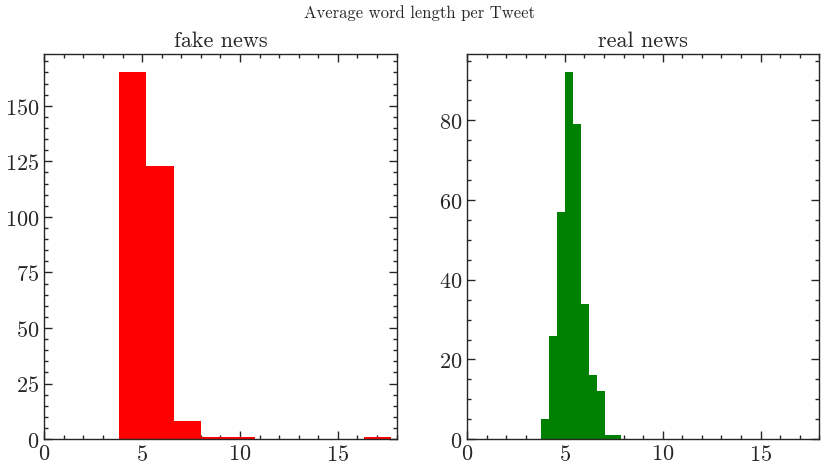

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# We calculate the number of words
tweet_len_0 = data[data['real'] == 0]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))
tweet_len_1 = data[data['real'] == 1]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake news')
ax1.set_xlim([0,18])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real news')
ax2.set_xlim([0,18])

fig.suptitle('Average word length per Tweet')

plt.show()

### Number of characters per tweet

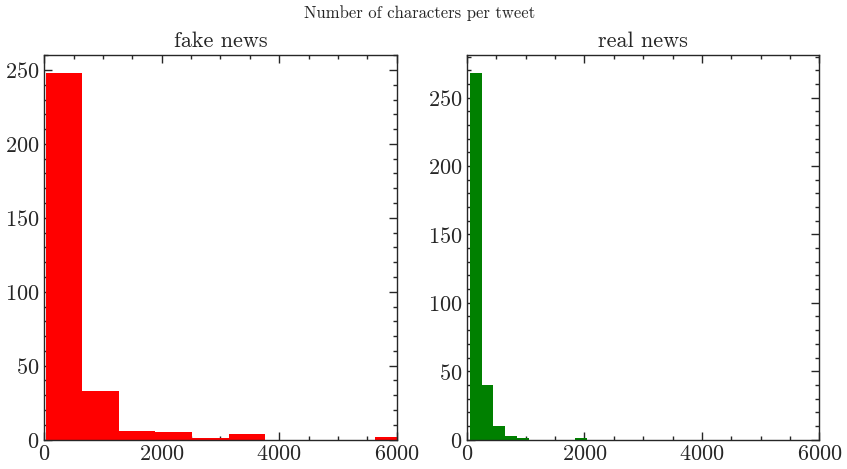

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de caracteres por tweet
tweet_len_0 = data[data['real'] == 0]['text'].str.len()
tweet_len_1 = data[data['real'] == 1]['text'].str.len()

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake news')
ax1.set_xlim([0,6000])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real news')
ax2.set_xlim([0,6000])

fig.suptitle('Number of characters per tweet')

plt.show()

We could continue to calculate input characteristics such as the following:
* Number of end words per Tweet
* Number of urls per Tweet
* Average number of characters per Tweet
* Number of characters per Tweet
* Number of punctuation marks per Tweet
* Number of hashtags per Tweet
* Number of @'s per tweet

### Most used stopwords

These words do not have a meaning by themselves, but modify or accompany others, this group usually consists of articles, pronouns, prepositions, adverbs and even some verbs.

In natural language data processing they are filtered before or after the process itself, they are not considered because they have no meaning, in the case of search engines such as Google they are not considered at the time of positioning, but they are considered at the time of displaying search results.

In [18]:
from nltk.corpus import stopwords
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [19]:
def plot_stopwords(label):
    tweets_stopwords = {}
    for words in data[data['real'] == label]['text'].str.split():
        sw = list(set(words).intersection(stopwords.words('spanish')))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    plt.bar(*zip(*top))
    plt.show()

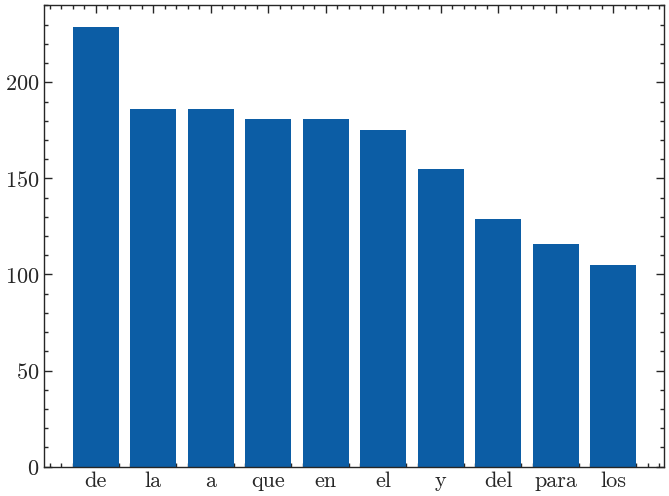

In [20]:
#Fake news.
from nltk.corpus import stopwords
plot_stopwords(0)

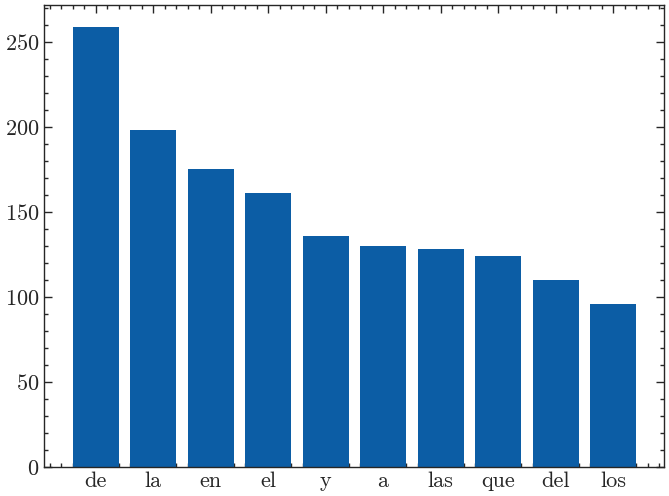

In [21]:
# real words
plot_stopwords(1)

### Punctuation analysis

In [22]:
import string

def plot_punctuation(label):
    tweets_stopwords = {}
    for words in data[data['real'] == label]['text'].str.split():
        sw = list(set(words).intersection(string.punctuation))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:20]
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top))
    plt.show()

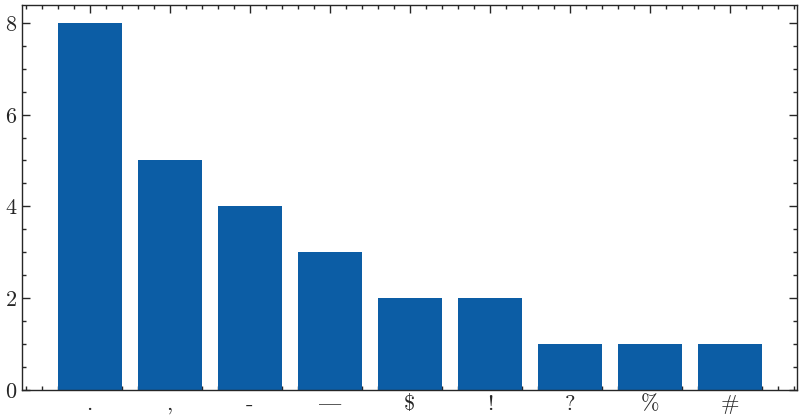

In [23]:
#fake news
plot_punctuation(0)

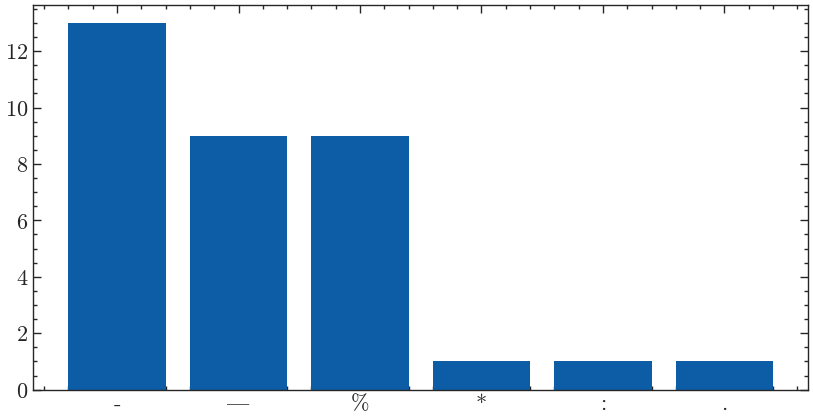

In [24]:
# real news
plot_punctuation(1)

### Ngram analysis

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(data['text']).sum(axis=0)

# We calculate
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 225 (\N{LATIN SMALL LETTER A WITH ACUTE}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


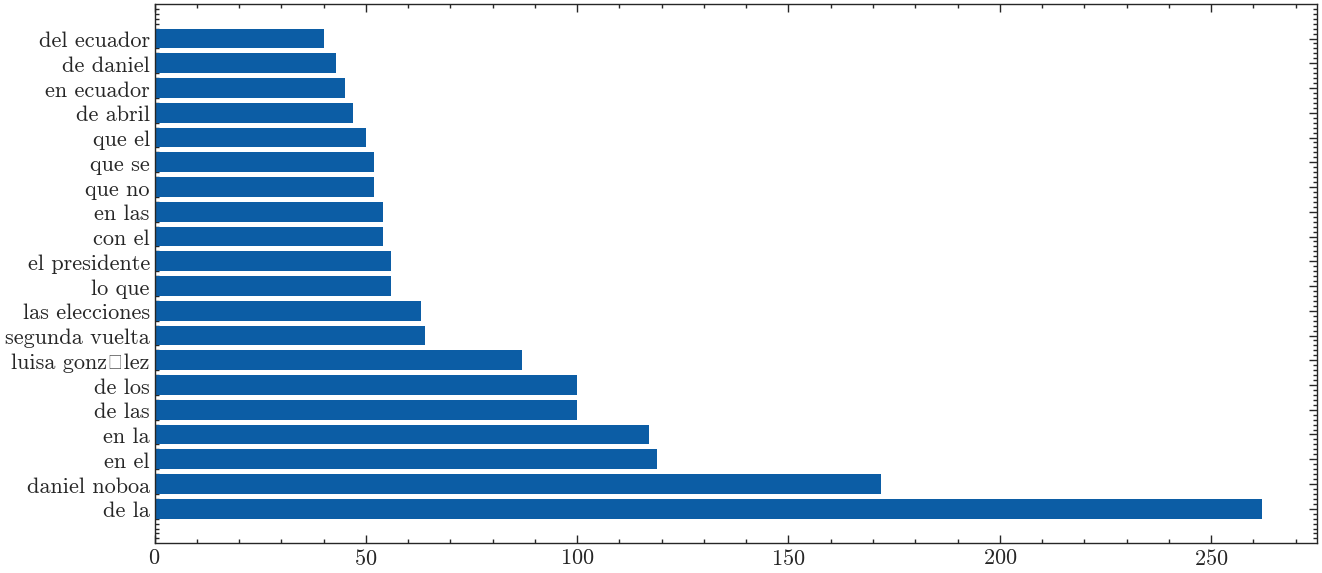

In [26]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 3. Data set cleaning

In [27]:
import re # to define regular expressions

In [28]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [29]:
remove_url("Esto es una prueba: http://localhost:8888/notebooks/Desktop/Workspace/Deep%20Neural%20Networks%20Course/11.%20Consideraciones%20de%20un%20proyecto%20de%20Deep%20Learning/code/Disaster%20Tweets.ipynb")

'Esto es una prueba: '

In [30]:
from html.parser import HTMLParser

class HTMLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []

    def handle_data(self, d):
        self.fed.append(d)

    def get_data(self):
        return ''.join(self.fed)

def remove_html(text):
    s = HTMLStripper()
    s.feed(text)
    return s.get_data()

In [31]:
remove_html('<tr><td align="left"><a href="../../issues/51/16.html#article">Phrack World News</a></td>')

'Phrack World News'

In [32]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [33]:
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [34]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [35]:
remove_punctuation("hello # how are you")

'hello  how are you'

In [36]:
# We apply our dataset cleaning functions
data_prep = data.copy()

data_prep['text'] = data['text'].apply(remove_url)
data_prep['text'] = data_prep['text'].apply(remove_html)
data_prep['text'] = data_prep['text'].apply(remove_emoji)
data_prep['text'] = data_prep['text'].apply(remove_punctuation)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(data_prep['text']).sum(axis=0)

# We calculate
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

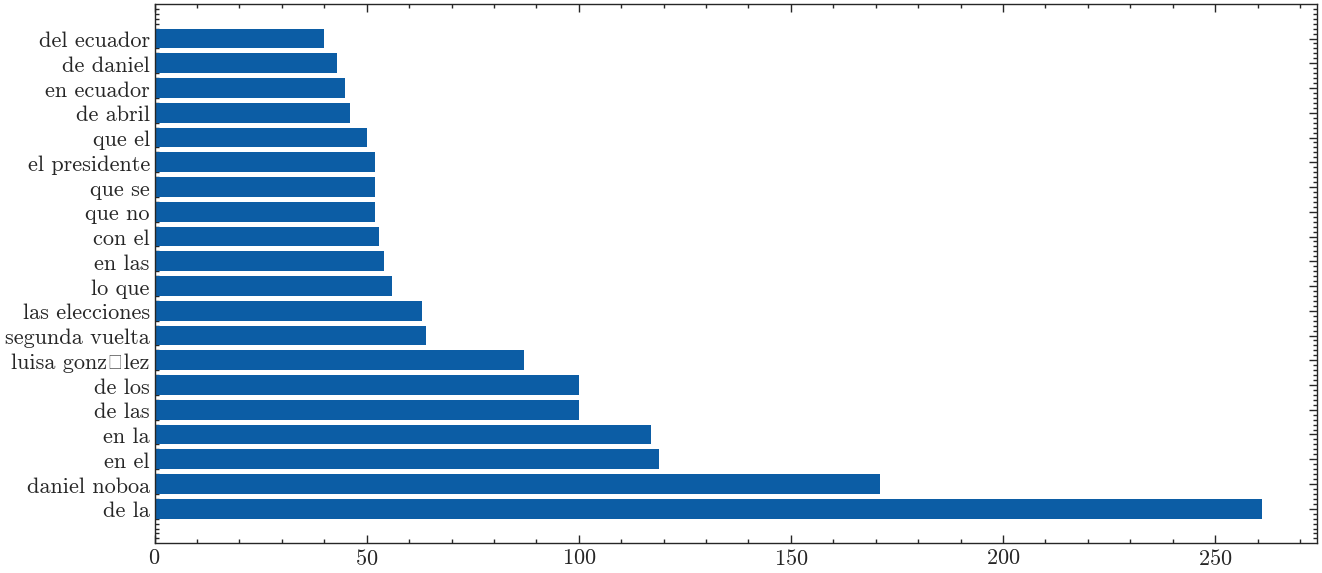

In [38]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 4. Vectorization of the data set

In [ ]:
y = data_prep['real']
X = data_prep['text']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.30)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #based in frequencies

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print("Length of training subset: ", len(X_train))
print("Length of validation subset: ", len(X_val))


Length of training subset:  435
Length of validation subset:  93


In [ ]:
X_train.shape

(435, 4975)

# Fake News Detection:
# Opción 1: Neural Network

## 6. Model construction

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:

history = model.fit(
    X_train,
    Y_train,
    epochs=10,
    batch_size=100,
    validation_data=(X_val, Y_val))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.5331 - loss: 0.6928 - val_accuracy: 0.7527 - val_loss: 0.6898
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9017 - loss: 0.6846 - val_accuracy: 0.8172 - val_loss: 0.6836
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9610 - loss: 0.6736 - val_accuracy: 0.8387 - val_loss: 0.6745
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9723 - loss: 0.6591 - val_accuracy: 0.8495 - val_loss: 0.6623
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9840 - loss: 0.6378 - val_accuracy: 0.8710 - val_loss: 0.6466
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9919 - loss: 0.6116 - val_accuracy: 0.8817 - val_loss: 0.6270
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9933 - loss: 0.5787 - val_accuracy: 0.8817 - val_loss: 0.6038
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9946 - loss: 0.5389 - val_accuracy: 0.8817 - val_loss: 0.5782

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.8694 - loss: 0.5406
Test Accuracy: 0.8404


## 7. Model evaluation

In [ ]:
Y_pred = model.predict(X_test).round(0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


## Metrics

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81        43
           1       0.82      0.90      0.86        51

    accuracy                           0.84        94
   macro avg       0.84      0.83      0.84        94
weighted avg       0.84      0.84      0.84        94



In [ ]:

# Guardando los resultados
def save_metrics(trues, preds, model_name="model", csv_path="nn1.csv"):
    report = classification_report(trues, preds, digits=4, output_dict=True)
    row = {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Weighted Precision": report["weighted avg"]["precision"],
        "Weighted Recall": report["weighted avg"]["recall"],
        "Macro F1": report["macro avg"]["f1-score"],
        "Class 0 F1": report["0"]["f1-score"],
        "Class 1 F1": report["1"]["f1-score"]
    }
    df = pd.DataFrame([row])
    df.to_csv(csv_path, index=False)
    print(f"Métricas guardadas en '{csv_path}'")

In [ ]:
save_metrics(Y_test, Y_pred, model_name="nn1")

Métricas guardadas en 'nn1.csv'


# OPCION 2: REGRESIÓN LOGÍSTICA

In [ ]:
# Importaciones adicionales necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import torch

# Configuración de dispositivo (GPU si está disponible)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Modelo tradicional de Machine Learning
print("\nEntrenando modelo de Regresión Logística...")
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, Y_train)

# Evaluación
#logreg_val_pred = logreg_model.predict(X_val)
#print("\nResultados de Regresión Logística (Validation Set):")
#print(classification_report(Y_val, logreg_val_pred))

logreg_test_pred = logreg_model.predict(X_test)
print("\nResultados de Regresión Logística (Test Set):")
print(classification_report(Y_test, logreg_test_pred))


Entrenando modelo de Regresión Logística...

Resultados de Regresión Logística (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.91      0.92      0.91        52

    accuracy                           0.90        93
   macro avg       0.90      0.90      0.90        93
weighted avg       0.90      0.90      0.90        93


Resultados de Regresión Logística (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        43
           1       0.84      0.90      0.87        51

    accuracy                           0.85        94
   macro avg       0.85      0.85      0.85        94
weighted avg       0.85      0.85      0.85        94



## Metrics

In [ ]:

# Guardando los resultados
def save_metrics(trues, preds, model_name="model", csv_path="reg_log.csv"):
    report = classification_report(trues, preds, digits=4, output_dict=True)
    row = {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Weighted Precision": report["weighted avg"]["precision"],
        "Weighted Recall": report["weighted avg"]["recall"],
        "Macro F1": report["macro avg"]["f1-score"],
        "Class 0 F1": report["0"]["f1-score"],
        "Class 1 F1": report["1"]["f1-score"]
    }
    df = pd.DataFrame([row])
    df.to_csv(csv_path, index=False)
    print(f"Métricas guardadas en '{csv_path}'")

In [ ]:
save_metrics(Y_test, logreg_test_pred, model_name="regression")

Métricas guardadas en 'reg_log.csv'


# OPCIÓN 3: RoBERTa based model

Website link: https://huggingface.co/PlanTL-GOB-ES/roberta-base-bne-sqac

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

In [ ]:
import torch
import numpy as np
from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Configuración del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# División de datos
X_train_Maria, X_temp_Maria, y_train_Maria, y_temp_Maria = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_Maria, X_test_Maria, y_val_Maria, y_test_Maria = train_test_split(X_temp_Maria, y_temp_Maria, test_size=0.5, random_state=42)

# Tokenizador
tokenizer_Maria = RobertaTokenizer.from_pretrained("BSC-TeMU/roberta-base-bne")

def tokenize_function_Maria(examples):
    return tokenizer_Maria(examples["text"], padding="max_length", truncation=True, max_length=128)

# Creación de datasets
train_dataset_Maria = Dataset.from_dict({"text": X_train_Maria, "label": y_train_Maria})
val_dataset_Maria = Dataset.from_dict({"text": X_val_Maria, "label": y_val_Maria})
test_dataset_Maria = Dataset.from_dict({"text": X_test_Maria, "label": y_test_Maria})

# Tokenización
train_dataset_Maria = train_dataset_Maria.map(tokenize_function_Maria, batched=True)
val_dataset_Maria = val_dataset_Maria.map(tokenize_function_Maria, batched=True)
test_dataset_Maria = test_dataset_Maria.map(tokenize_function_Maria, batched=True)

# Modelo
model_maria = RobertaForSequenceClassification.from_pretrained(
    "BSC-TeMU/roberta-base-bne",
    num_labels=2
).to(device)

# Función para calcular métricas
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'f1': f1_score(labels, predictions),
        'precision': precision_score(labels, predictions),
        'recall': recall_score(labels, predictions),
    }

# Argumentos de entrenamiento
training_args_Maria = TrainingArguments(
    output_dir='./results_model_maria',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs_model_maria',
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model='f1',  # Ahora esta métrica está disponible
    greater_is_better=True,
    report_to="none",
    save_total_limit=1
)

# Trainer
trainer_Maria = Trainer(
    model=model_maria,
    args=training_args_Maria,
    train_dataset=train_dataset_Maria,
    eval_dataset=val_dataset_Maria,
    compute_metrics=compute_metrics  # ¡Función de métricas añadida!
)

# Entrenamiento
print("\nEntrenando modelo_maria...")
trainer_Maria.train()

# Evaluación
print("\nEvaluando en conjunto de test...")
test_predictions_Maria = trainer_Maria.predict(test_dataset_Maria)
logits_Maria = test_predictions_Maria.predictions
labels_Maria = test_predictions_Maria.label_ids

predictions_Maria = np.argmax(logits_Maria, axis=-1)

# Cálculo de métricas
accuracy_model_maria = accuracy_score(labels_Maria, predictions_Maria)
precision_model_maria = precision_score(labels_Maria, predictions_Maria)
recall_model_maria = recall_score(labels_Maria, predictions_Maria)
f1_model_maria = f1_score(labels_Maria, predictions_Maria)
probs_Maria = torch.softmax(torch.tensor(logits_Maria), dim=1).numpy()
auc_model_maria = roc_auc_score(labels_Maria, probs_Maria[:, 1])

print("\nResultados finales de model_maria en test:")
print(f"Accuracy: {accuracy_model_maria:.4f}")
print(f"Precision: {precision_model_maria:.4f}")
print(f"Recall: {recall_model_maria:.4f}")
print(f"F1-score: {f1_model_maria:.4f}")
print(f"AUC: {auc_model_maria:.4f}")

model_maria.save_pretrained('./modelo_maria_fake_news')
tokenizer_Maria.save_pretrained('./modelo_maria_fake_news')

print("\nVariables con las métricas:")
print(f"accuracy_model_maria = {accuracy_model_maria}")
print(f"precision_model_maria = {precision_model_maria}")
print(f"recall_model_maria = {recall_model_maria}")
print(f"f1_model_maria = {f1_model_maria}")
print(f"auc_model_maria = {auc_model_maria}")

Map:   0%|          | 0/435 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Map:   0%|          | 0/94 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at BSC-TeMU/roberta-base-bne and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Entrenando modelo_maria...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.587946,0.774194,0.814159,0.766667,0.867925
2,No log,0.647859,0.752688,0.800000,0.741935,0.867925
3,No log,0.623714,0.784946,0.818182,0.789474,0.849057



Evaluando en conjunto de test...



Resultados finales de model_maria en test:
Accuracy: 0.8085
Precision: 0.8214
Recall: 0.8519
F1-score: 0.8364
AUC: 0.8843

Variables con las métricas:
accuracy_model_maria = 0.8085106382978723
precision_model_maria = 0.8214285714285714
recall_model_maria = 0.8518518518518519
f1_model_maria = 0.8363636363636363
auc_model_maria = 0.8842592592592593


## Metrics

In [ ]:
# Guardando los resultados
def save_metrics(trues, preds, model_name="model", csv_path="RoBeRTa_based.csv"):
    report = classification_report(trues, preds, digits=4, output_dict=True)
    row = {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Weighted Precision": report["weighted avg"]["precision"],
        "Weighted Recall": report["weighted avg"]["recall"],
        "Macro F1": report["macro avg"]["f1-score"],
        "Class 0 F1": report["0"]["f1-score"],
        "Class 1 F1": report["1"]["f1-score"]
    }
    df = pd.DataFrame([row])
    df.to_csv(csv_path, index=False)
    print(f"Métricas guardadas en '{csv_path}'")

In [ ]:
print(classification_report(labels_Maria, predictions_Maria))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.82      0.85      0.84        54

    accuracy                           0.81        94
   macro avg       0.81      0.80      0.80        94
weighted avg       0.81      0.81      0.81        94



In [ ]:
save_metrics(labels_Maria, predictions_Maria, model_name="RoBERTa_based")

Métricas guardadas en 'RoBeRTa_based.csv'


# Opción 4: Neural Network 2:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


# Modelo neuronal mejorado
print("\nEntrenando modelo de Red Neuronal mejorada...")
improved_nn = models.Sequential()
improved_nn.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
improved_nn.add(layers.Dropout(0.5))
improved_nn.add(layers.Dense(64, activation='relu'))
improved_nn.add(layers.Dropout(0.3))
improved_nn.add(layers.Dense(1, activation='sigmoid'))

improved_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history_improved = improved_nn.fit(
    X_train,
    Y_train,
    epochs=30,
    batch_size=512,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping]
)

# Evaluación
nn_test_pred = (improved_nn.predict(X_test) > 0.5).astype("int32")
print("\nResultados de Red Neuronal Mejorada (Test Set):")
print(classification_report(Y_test, nn_test_pred))


Entrenando modelo de Red Neuronal mejorada...
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - Precision: 0.5217 - Recall: 0.0545 - accuracy: 0.4966 - loss: 0.6926 - val_Precision: 1.0000 - val_Recall: 0.0385 - val_accuracy: 0.4624 - val_loss: 0.6922
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - Precision: 0.7931 - Recall: 0.1045 - accuracy: 0.5333 - loss: 0.6890 - val_Precision: 1.0000 - val_Recall: 0.1346 - val_accuracy: 0.5161 - val_loss: 0.6898
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - Precision: 0.8889 - Recall: 0.1818 - accuracy: 0.5747 - loss: 0.6846 - val_Precision: 1.0000 - val_Recall: 0.2115 - val_accuracy: 0.5591 - val_loss: 0.6870
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - Precision: 0.9464 - Recall: 0.2409 - accuracy: 0.6092 - loss: 0.6793 - val_Precision: 1.0000 - val_Recall: 0.2500 - val_accuracy: 0.5806 - val_loss: 0.6839
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - Precision: 0.9730 - Recall: 0.3273 - accuracy: 0.6552 - loss: 0.6743 - v

## Metrics

In [ ]:
# Guardando los resultados
def save_metrics(trues, preds, model_name="model", csv_path="nn2.csv"):
    report = classification_report(trues, preds, digits=4, output_dict=True)
    row = {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Weighted Precision": report["weighted avg"]["precision"],
        "Weighted Recall": report["weighted avg"]["recall"],
        "Macro F1": report["macro avg"]["f1-score"],
        "Class 0 F1": report["0"]["f1-score"],
        "Class 1 F1": report["1"]["f1-score"]
    }
    df = pd.DataFrame([row])
    df.to_csv(csv_path, index=False)
    print(f"Métricas guardadas en '{csv_path}'")

In [ ]:
save_metrics(Y_test, nn_test_pred, model_name="nn2")

Métricas guardadas en 'nn2.csv'
